## Ensemble Techniques Project

## Part A - 30 Marks

**Part 1**

In [53]:
pwd()

'C:\\Users\\Geeth'

In [11]:
# Importing liberies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Part 1- 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable**

In [12]:
df1=pd.read_csv('TelcomCustomer-Churn_1.csv')

**Part 1- 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable**

In [13]:
df2=pd.read_csv('TelcomCustomer-Churn_2.csv')

**Part 1- 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

In [14]:
df3 = pd.merge(df1, df2, how='outer', on = 'customerID')

**Part 1- 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python**

In [15]:
print ('Number of Columns in df1: ' , len(df1.columns))
print ('----------------------------------------------')

print ('Number of Columns in df2: ' , len(df2.columns))
print ('----------------------------------------------')

print ('Number of Columns in df3: ' , len(df3.columns))
print ('----------------------------------------------')


print('\n Columns in df1=')

x=set(df3.columns) - set(df2.columns)

print(x)
print("\nNumber of Columns in df1=", len(x))
print('\nAll rows are incorporated from the both Datasets')

Number of Columns in df1:  10
----------------------------------------------
Number of Columns in df2:  12
----------------------------------------------
Number of Columns in df3:  21
----------------------------------------------

 Columns in df1=
{'Partner', 'Dependents', 'SeniorCitizen', 'MultipleLines', 'gender', 'PhoneService', 'InternetService', 'OnlineSecurity', 'tenure'}

Number of Columns in df1= 9

All rows are incorporated from the both Datasets


**Part 1- 2 a Impute missing/unexpected values in the DataFrame**

In [16]:
#null values from the Datasets, and Impute missing/unexpected values in the DataFrame

print('Null Values in the Dataset are:')
print('-------------------------------')
print(df3.isnull().sum())

Null Values in the Dataset are:
-------------------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [17]:
#No null values found

for i in df3.columns[1:]:
    print(df3[i].value_counts())
    print("---------------------------------------------------")

Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------

In [31]:
#unexpected values found in Total Charges column - 11 Spaces
#no unexpected values found in other columns

In [18]:
#Replacing the spaces with Null values and then dropping them

df3=df3.replace(' ', np.nan)

df3.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df3.dropna(inplace=True)
df3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df3.shape

(7032, 21)

#Unexcepted values are removed.

**part 1- 2 b Make sure all the variables with continuous values are of ‘Float’ type**

In [21]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
#converting TotalCharges to float value.

df3['TotalCharges']  = df3['TotalCharges'].astype('float64')

In [23]:
df3['TotalCharges'].dtypes

dtype('float64')

**Part 1- 2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-cha**

In [24]:
# show percentage distribution in the pie-chart.

def pie_chart(dataset):
    for i in dataset.columns[1:]:
        if dataset[i].dtypes == 'object':
            plt.subplots(figsize=(3,3))
            dataset[i].value_counts().plot(kind='pie',autopct='%1.2f%%');

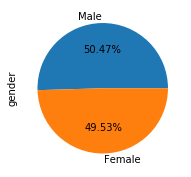

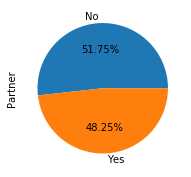

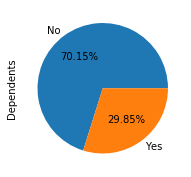

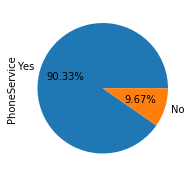

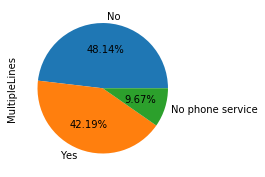

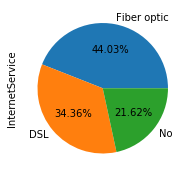

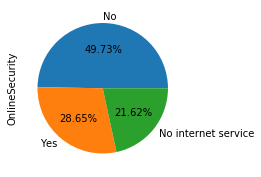

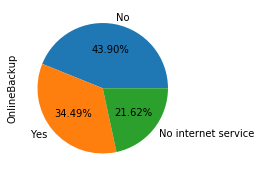

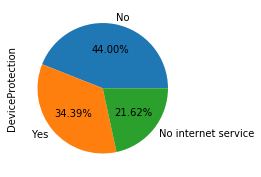

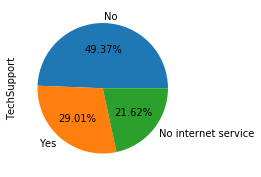

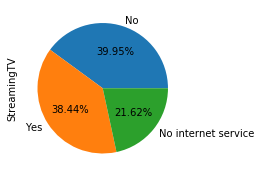

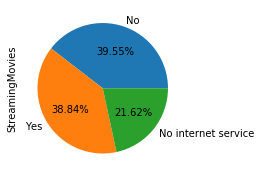

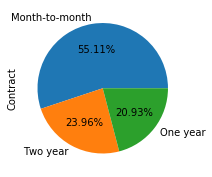

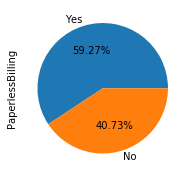

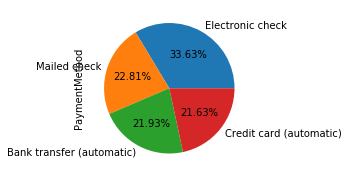

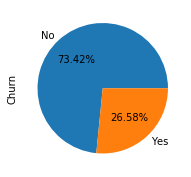

In [98]:
pie_chart(df3)

**Part 1- 2 d.Share insights for Q2.c**

In [80]:
#Very few customers churned.
#Most of the people have taken phone services.
# Most of the people having Monthly Subscribtion.
# Majority of the people paying bill through paperlessbilling


**Part 1 - 2 e.Encode all the appropriate Categorical features with the best suitable approach**

In [25]:
Dict1 = {"Partner"         : {"Yes": 1, "No": 0},
         "Dependents"      : {"Yes": 1, "No": 0},
         "PhoneService"    : {"Yes": 1, "No": 0},
         "MultipleLines"   : {"Yes": 1, "No": 0,    "No phone service": 0},
         "InternetService" : {"Fiber optic" : 1,    "DSL": 0,     "No": 0},
         "OnlineSecurity"  : {"Yes": 1, "No": 0, "No internet service": 0},
         "OnlineBackup"    : {"Yes": 1, "No": 0, "No internet service": 0},
         "DeviceProtection": {"Yes": 1, "No": 0, "No internet service": 0},
         "TechSupport"     : {"Yes": 1, "No": 0, "No internet service": 0},
         "StreamingTV"     : {"Yes": 1, "No": 0, "No internet service": 0},
         "StreamingMovies" : {"Yes": 1, "No": 0, "No internet service": 0},
         "PaperlessBilling": {"Yes": 1, "No": 0},
         "Churn"           : {"Yes": 1, "No": 0}}

List1 =['gender', 'Contract', 'PaymentMethod']


df3 = df3.replace(Dict1)
df3 = pd.get_dummies(df3, columns=List1)

df3.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,1,0,0,...,1,1,0,1,0,0,0,0,1,0


In [26]:
#Dropping CustID column

X = df3.drop(['customerID','Churn'], axis=1)
y = df3['Churn']

X.shape

(7032, 25)

**Part 1- 2 f.Split the data into 80% train and 20% test.**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**Part 1 - 2 g.Normalize/Standardize the data with the best suitable approach**

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
print(scaler)
scaled_train = scaler.transform(X_train)
print(scaled_train)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_test)
print(scaler)
scaled_test = scaler.transform(X_test)
print(scaled_test)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0. 1. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]]


**Part 1 - 3 a. Train a model using XGBoost. Also print best performing parameters along with train and test performance.**

In [ ]:
##importing xgboost


In [30]:
import xgboost
from xgboost import XGBClassifier

#Create the base model.
XGB = XGBClassifier()

#fitting the model to train dataset.
XGB.fit(scaled_train, y_train)

#Predict target variable.
y_predict = XGB.predict(scaled_test)

#check train accuracy.
XGB.score(scaled_train, y_train)

0.9377777777777778

In [31]:
#check test accuracy
XGB.score(scaled_test, y_test)

0.7810945273631841

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.60      0.49      0.54       366

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



**Part 1 - 3 b Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.**

In [33]:
from xgboost import XGBClassifier

#Create the base model
XGB = XGBClassifier(n_estimators=5, max_depth=6, booster = None, max_leaves = 100)

#fit the model to train dataset
XGB.fit(scaled_train, y_train)

#Predict target variable
y_predict = XGB.predict(scaled_test)

#check train accuracy
XGB.score(scaled_train, y_train)

0.8252444444444444

In [34]:
#check test accuracy
XGB.score(scaled_test, y_test)

0.7924662402274343

In [35]:
#check test accuracy
XGB.score(scaled_test, y_test)

0.7924662402274343

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.63      0.48      0.55       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [32]:
#n_estimators, max_depth contributed the most among all the parameters

## Part B - 30 Marks

**1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 
1 Dataset from Part 1 (single/merged)**

In [44]:
#Reading the dataset and EDA

def fun1(df1,df2):
    global Data
    Data=pd.merge(df1,df2,how='outer', on='customerID')
    print("Data loaded Successfully into Data")
    print("---------------------------------")
    print("shape of dataset: ", Data.shape)
    print("Info of dataset: ", Data.info())
    print("---------------------------------")
    print("Null Value details:")
    print(Data.isnull().sum())
    print(Data.dropna(inplace=True))
    print(" ")
    print("Null Values (if exists), have been deleted")
    print("---------------------------------")
    print("Finding unexpected values in the datset...")
    print("No. of unexpected values are: ", len(Data[Data['TotalCharges']==' '])) 
    Data = Data[Data['TotalCharges']!=' ']
    print("Unexpected values found in 'TotalCharge Column have been deleted'")
    print("Shape after delete: ", Data.shape)
    print("Changing the TotalCharges Column to float...")
    Data['TotalCharges']  = Data['TotalCharges'].astype('float64')
    print(Data.dtypes)
    print("Encoding.....")
    Dict1 = {"Partner"         : {"Yes": 1, "No": 0},
             "Dependents"      : {"Yes": 1, "No": 0},
             "PhoneService"    : {"Yes": 1, "No": 0},
             "MultipleLines"   : {"Yes": 1, "No": 0,    "No phone service": 0},
             "InternetService" : {"Fiber optic" : 1,    "DSL": 0,     "No": 0},
             "OnlineSecurity"  : {"Yes": 1, "No": 0, "No internet service": 0},
             "OnlineBackup"    : {"Yes": 1, "No": 0, "No internet service": 0},
             "DeviceProtection": {"Yes": 1, "No": 0, "No internet service": 0},
             "TechSupport"     : {"Yes": 1, "No": 0, "No internet service": 0},
             "StreamingTV"     : {"Yes": 1, "No": 0, "No internet service": 0},
             "StreamingMovies" : {"Yes": 1, "No": 0, "No internet service": 0},
             "PaperlessBilling": {"Yes": 1, "No": 0},
             "Churn"           : {"Yes": 1, "No": 0}}
    List1 =['gender', 'Contract', 'PaymentMethod']
    Data = Data.replace(Dict1)
    Data = pd.get_dummies(Data, columns=List1, drop_first=True)
    print(Data.head(3))
    print("Data has been cleaned Successfully.")
    

In [49]:
#Split Data

def fun2():
    global X,y,X_train, X_test, y_train, y_test
    print("shape before split :", Data.shape)
    print("Data is getting split")
    X=Data.drop(['Churn','customerID'], axis=1)
    y=Data['Churn']
    print("Shape after XY-Split:", X.shape)
    print("Test-Train Split:")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    print("Test-Train Split was successful")


In [50]:
# Scaling

def fun3():
    global scaled_train, scaled_test
    print("Scaling the data.....")
    from sklearn.preprocessing import MinMaxScaler
    
    #Train Scale
    scaler1 = MinMaxScaler().fit(X_train)
    print(scaler1)
    scaled_train = scaler1.transform(X_train)
    print(scaled_train)
    
    #Test-Scale
    scaler2 = MinMaxScaler().fit(X_test)
    print(scaler2)
    scaled_test = scaler2.transform(X_test)
    print(scaled_test)
    print("Scaling was done succesfully.")

In [46]:
#Model Build


def fun4():
    
    #Model-1
    global test_scores, XGB, NNH, LR
    from xgboost import XGBClassifier

    #Create the base model
    XGB = XGBClassifier()

    #fit the model to train dataset
    XGB.fit(scaled_train, y_train)

    #check train,test accuracy
    XGB_Tr = XGB.score(scaled_train, y_train)
    XGB_Ts = XGB.score(scaled_test, y_test)
    
    print(" ")
    print("Model-1: XGB")
    print("Train Accuracy of XGB: ", XGB_Tr)
    print("Test  Accuracy of XGB: ", XGB_Ts)
    #+++++++++++++++++++++++++++++++++++++++++++
    
    #Model-2:
    from sklearn.neighbors import KNeighborsClassifier

    #Create the base model
    NNH = KNeighborsClassifier()

    #fit the model to train dataset
    NNH.fit(scaled_train, y_train)

    #check train,test accuracy
    NNH_Tr = NNH.score(scaled_train, y_train)
    NNH_Ts = NNH.score(scaled_test, y_test)
    
    print("Model-2: KNN")
    print("Train Accuracy of KNN: ", NNH_Tr)
    print("Test  Accuracy of KNN: ", NNH_Ts)
    #++++++++++++++++++++++++++++++++++++++++++++++
    
    #Model-3:
    from sklearn.linear_model import LogisticRegression

    #Create the base model
    LR = LogisticRegression()

    #fit the model to train dataset
    LR.fit(scaled_train, y_train)

    #check train,test accuracy
    LR_Tr = LR.score(scaled_train, y_train)
    LR_Ts = LR.score(scaled_test, y_test)
    
    print("Model-3: LOG-R")
    print("Train Accuracy of LOG-R: ", LR_Tr)
    print("Test  Accuracy of LOG-R: ", LR_Ts)
    #++++++++++++++++++++++++++++++++++++++++++++++
    
    test_scores = [XGB_Ts, NNH_Ts, LR_Ts]
    
    print("Model building is completed")

In [51]:
def fun5():
    import pickle
    top_score = max(test_scores)
    
    x=1
    for i in test_scores:
        if i==top_score:
            if  x==1:
                print("XGB is the best: ", top_score)
                pickle.dump(XGB, open('top_model.pkl', 'wb'))
            elif x==2:
                print("KNN is the best: ", top_score)
                pickle.dump(NNH, open('top_model.pkl', 'wb'))
            elif x==3:
                print("Log-R is the best: ", top_score)
                pickle.dump(LR, open('top_model.pkl', 'wb'))
        x=x+1
    
    print("Pickle is successful.")

In [47]:
def Main(x,y):
    fun1(x,y)
    fun2()
    fun3()
    fun4()
    fun5()

In [52]:
# Calling Main Function 

Main(df1,df2)  

Data loaded Successfully into Data
---------------------------------
shape of dataset:  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   obj